# Introduction to Autoencoders

What are Autoencoders ?

`Autoencoders` are self-supervised machine learning models which are used to reduce the size of input data by recreating it. These models are trained as supervised machine learning models and during inference, they work as unsupervised models that’s why they are called self-supervised models. Autoencoder is made up of two components:

1.  Encoder: It works as a compression unit that compresses the input data.

2. Decoder: It decompresses the compressed input by reconstructing it.


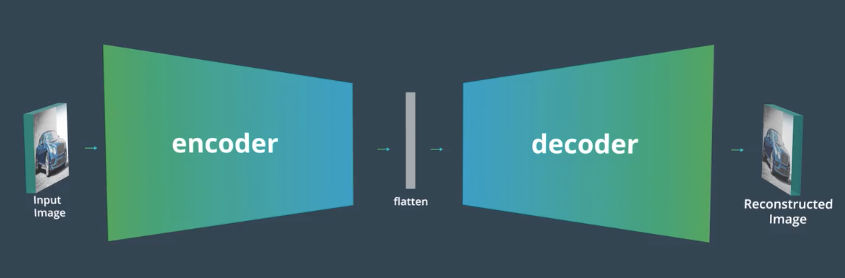

In an Autoencoder both Encoder and Decoder are made up of a combination of NN (Neural Networks) layers, which helps to reduce the size of the input image by recreating it. In the case of CNN Autoencoder, these layers are CNN layers (Convolutional, Max Pool, Flattening, etc.) while in the case of RNN/LSTM their respective layers are used.

## Types of Autoencoders

Autoencoders are flexible neural networks that can be customized for various tasks. They come in different forms, each with unique strengths and limitations.

    Vanilla Autoencoders: Basic autoencoders that efficiently encode and decode data.

    Denoising Autoencoders: Improved robustness to noise and irrelevant information.
    
    Sparse Autoencoders: Learn more compact and efficient data representations.
    
    Contractive Autoencoders: Generate representations less sensitive to minor data variations.
    
    Variational Autoencoders: Generate new data points that resemble the training data.

The choice of autoencoder depends on the specific task and data characteristics.

## Applications of Autoencoders

Three are several applications of Autoencoders some of the important ones are:

1. File Compression: Primary use of Autoencoders is that they can reduce the dimensionality of input data which we in common refer to as file compression. Autoencoders works with all kinds of data like Images, Videos, and Audio, this helps in sharing and viewing data faster than we could do with its original file size.

2. Image De-noising: Autoencoders are also used as noise removal techniques (Image De-noising), what makes it the best choice for De-noising is that it does not require any human interaction, once trained on any kind of data it can reproduce that data with less noise than the original image.

3. Image Transformation: Autoencoders are also used for image transformations, which is typically classified under GAN(Generative Adversarial Networks) models. Using these we can transform B/W images to colored one and vice versa, we can up-sample and down-sample the input data, etc.

In [1]:
# Necessary Libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model
from random import randint

2024-08-11 22:00:02.441506: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-11 22:00:04.025076: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### The Data

MNIST data is available on Keras and it is imported with one line of code within seconds. Since the purpose of the model will be learning how to reconstruct the data, it is an unsupervised task or with a better term I enjoy, it is self-supervised. Thus, labels are not necessary and not stored while loading the data.

The train set has 60000 and the test set has 10000 mono-channel images with 28x28 sizes. The test set will be used for validation during training.

In [2]:
(X_train,_), (X_test,_) = tf.keras.datasets.mnist.load_data()

### The Encoder

First, the images will be flattened into a vector having 784 (28 times 28) elements. And then, after a hidden layer with 100 neurons, the output of the encoder will have 20 parameters. This is named the latent representation of the data. If the model gets successfully trained, it will be able to represent the MNIST images with only 20 numbers. This is the stage where we compressed the data which is named the bottleneck layer.

In [3]:
hidden_size = 100
latent_size = 20
input_layer = layers.Input(shape = X_train.shape[1:])
flattened = layers.Flatten()(input_layer)
hidden = layers.Dense(hidden_size, activation = 'relu')(flattened)
latent = layers.Dense(latent_size, activation = 'relu')(hidden)
encoder = Model(inputs = input_layer, outputs = latent, name = 'encoder')
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,520 (314.53 KB)

 Trainable params: 80,520 (314.53 KB)

 Non-trainable params: 0 (0.00 B)

### The Decoder

The decoder aims to undo what the encoder did by reverse operations. Meaning, latent variables will be upsampled to 100 and 784 respectively. Finally, the vector will be reshaped into an image matrix.

In [8]:
input_layer_decoder = layers.Input(shape = encoder.output.shape)
upsampled = layers.Dense(hidden_size, activation = 'relu')(input_layer_decoder)
upsampled = layers.Dense(encoder.layers[1].output_shape[-1], activation = 'relu')(upsampled)
constructed = layers.Reshape(X_train.shape[1:])(upsampled)
decoder = Model(inputs = input_layer_decoder, outputs = constructed, name= 'decoder')
decoder.summary()

AttributeError: 'Flatten' object has no attribute 'output_shape'

In [ ]:
autoencoder = Model(inputs = encoder.input, outputs = decoder(encoder.output))
autoencoder.summary()